## Iris Species
### Classify iris plants into three species in this classic dataset

Cuantificar la variación morfológica del Iris con las flores de tres especies relacionadas.

El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: lo largo y lo ancho del sépalos y pétalos, en centímetros. Basado en la combinación de estos cuatro rasgos.

https://es.wikipedia.org/wiki/Iris_flor_conjunto_de_datos

Los datos son:

    Id                       Unique ID

    SepalLengthCm            Length of the sepal (cm)

    SepalWidthCm             Width of the sepal (cm)

    PetalLengthCm            Length of the petal (cm)

    PetalWidthCm             Width of the petal (cm)

    SpeciesSpecies           name
    
    
Objetivo: Clasificar las tres especies de flores segun los datos obtenidos. 

In [0]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [0]:
# Cargamos el dataset
data = pd.read_csv(r'C:\Users\avelazquez\Downloads/Iris.csv')

# Vemos que cargamos
data.tail(5)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [0]:
# Nuestro objetivo es Species, entonces vemos cuanto tenemos
print("Species")
print(data['Species'].unique())

Species
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


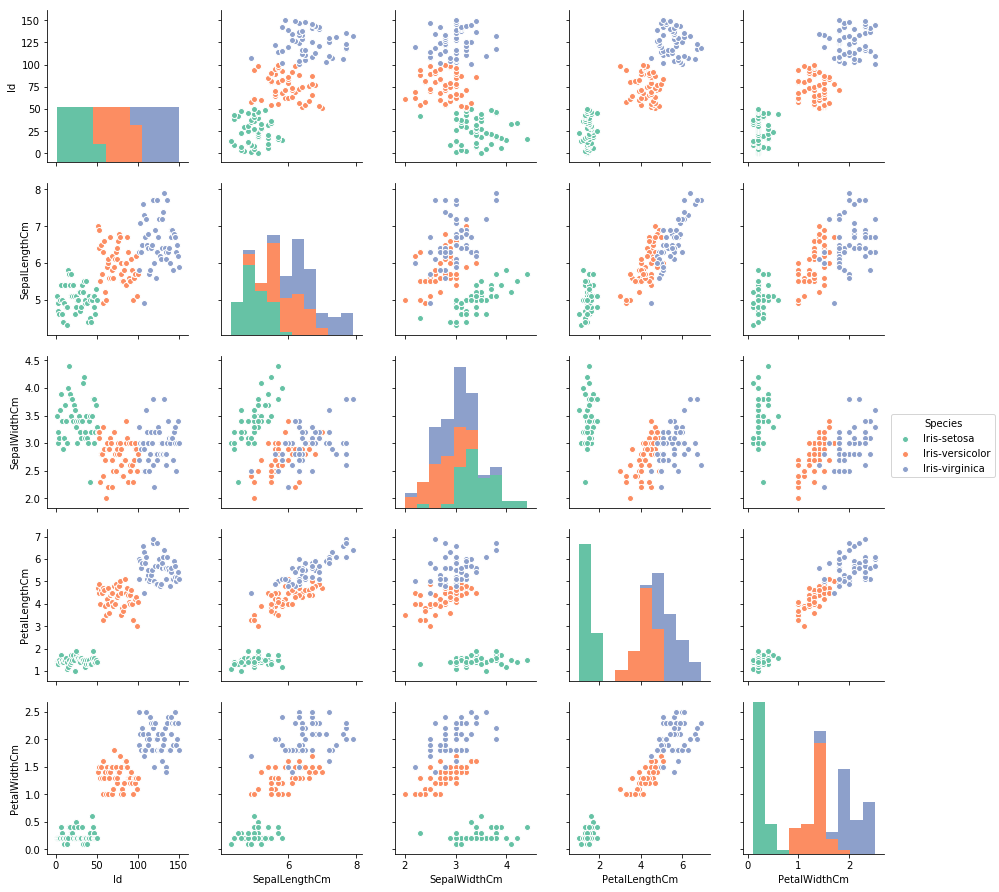

In [0]:
# Creating a pairplot to visualize the similarities and especially difference between the species
sns.pairplot(data=data, hue='Species', palette='Set2')

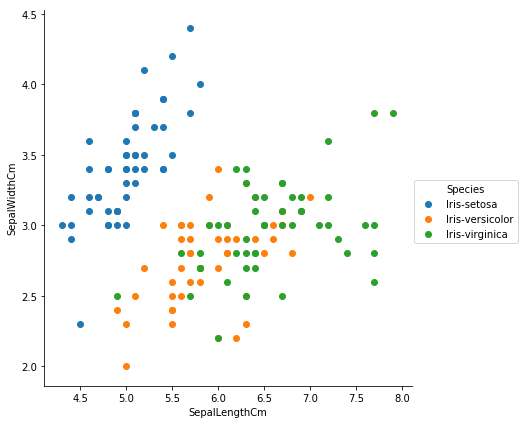

In [0]:
# un scatter plot para visualizar las clases con colores
sns.FacetGrid(data, hue="Species", size=6) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

plt.show()

### Hay tres tipos de Especies => Multi class problem!

Estrategia One vs One 

![Axis diagram](https://image.slidesharecdn.com/linearmodelsandmulticlassclassification2-170312171304/95/linear-models-and-multiclass-classification-25-638.jpg?cb=1489338888)


La idea es desarrollar un clasificador binario para cada posible par de clases y luego tener un clasificador "ensamblado"

Si un problema es multi-class (n clases) el One vs One va a construir n(n-1)/2. Luego la label va a ser finalizada por el voto de la mayoria. 

Si tenemos tres clases, A, B and C. El OVO va a estar compuesto de  3 (= 3 * (3 - 1) / 2) clasificadores binarios. 
El primero va a clasificar A de B, el segundo A de C, y el tercer B de
C.

Finalmente la muestra x va a tener los siguientes labels, e.j. (A, B, B). y por votacion es asignado la clase perteneciente.


In [0]:
# Preprocessing 

# Step1 : Separamos lo que son las features con el target. 


features = list(data.columns[1:5])            # SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm	
target = data.columns[5]                      # Species

print('Features:',features)
print('Target:',target)

# Guardamos feature matrix en "X"
X = data.iloc[:,1:5]                          # slicing: todas las filas y columnas 1 a 4

# Guardamos target vector in "y"
y = data.iloc[:,5]                            # slicing: todas las filas y columna 5


print(y.shape)
print(X.shape)


('Features:', ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
('Target:', 'Species')
(150L,)
(150, 4)


In [0]:
# Step2 : Transformamos el label del target en formato numerico para poder procesarlo 
from sklearn import preprocessing

# LabelEncoder sirve para normalizar las labels entre 0 y n-clases y ademas transforma a numerico. 

# 1 - Primero creo un objeto (con determinados argumentos) que llama a la funcion que deseo
le = preprocessing.LabelEncoder()

# 2 - AL objeto le aplico la funcion fit a los datos desados 
y=le.fit_transform(y)

# 3 - Agregamos la nueva columna a nuestro data set 
data['EncodedSpecies'] = y

print('Classes:',le.classes_)
print('Response variable after encoding:',y)
data.tail(10)

('Classes:', array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object))
('Response variable after encoding:', array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64))


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,EncodedSpecies
140,141,6.7,3.1,5.6,2.4,Iris-virginica,2
141,142,6.9,3.1,5.1,2.3,Iris-virginica,2
142,143,5.8,2.7,5.1,1.9,Iris-virginica,2
143,144,6.8,3.2,5.9,2.3,Iris-virginica,2
144,145,6.7,3.3,5.7,2.5,Iris-virginica,2
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2


In [0]:
# Step 3: separar train y test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
#random_state: seed utilizada 
#test_size: numero entre 0 y 1 e indicar la proporcion del dataset que va a ser test. 
print(x_train.shape)
print(y_train.shape)

(90, 4)
(90L,)


In [0]:
# Step 4: auto scaling train- set (mean = 0, std = 1)
scaler = preprocessing.StandardScaler().fit(x_train)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
x_train_scaled = scaler.transform(x_train)  
print(x_train_scaled.mean(axis=0))
print(x_train_scaled.std(axis=0))

[-1.83556873e-15 -1.77882400e-15 -3.94745964e-17 -1.34460344e-16]
[1. 1. 1. 1.]


In [0]:
x_test_scaled = scaler.transform(x_test)  
print(x_test_scaled.mean(axis=0))
print(x_test_scaled.std(axis=0))

[-0.14458243  0.02501303 -0.22152379 -0.26958652]
[1.05006824 1.19190877 1.11436585 1.03427381]


##### Por que la media es distinto de 0 y la variancia de 1?

In [0]:
# fit gaussian (RBF) SVM con: 
# -grid Search de C y gamma ({'C': [1, 10, 100, 1000], 'gamma':[0.0001,0.001, 0.01, 0.1,1, 10,100], 'kernel': ['rbf']})

# Cross Validation = 5

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100, 1000], 'gamma':[0.0001,0.001, 0.01, 0.1,1, 10,100]}
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid = parameters, refit = True, cv = 5)
clf.fit = (x_train_scaled, y_train.ravel())
#Non-linear SVM

#model = SVC(C=1.0, kernel='rbf', gamma = 'auto' )
#model.fit(x_train_scaled, y_train.ravel())

scores = clf.grid_scores_

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

 #### CV Folds
 
 ![Axis diagram](http://s5047.pcdn.co/wp-content/uploads/2015/06/07_cross_validation_diagram.png)

In [0]:
# prediction
y_pred=model.predict(x_test_scaled)
print(y_pred)

In [0]:
# Model prediciton
print(model.score(x_test_scaled,y_test.ravel()))

#### Confusion matrix

Es un herramienta que permite la visualización del desempeño de un algoritmo que se emplea en aprendizaje supervisado. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real. Uno de los beneficios de las matrices de confusión es que facilitan ver si el sistema está confundiendo dos clases.

![Axis diagram](https://1.bp.blogspot.com/-rI0KVjNe3Fs/WqA3SrnF04I/AAAAAAAAA3w/fkkioqiPo20l20WefaKNcRp3chb4g8fJACLcBGAs/s640/1.jpg)


In [0]:
#Plot Confusion Matrix


from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

In [0]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)],
                  columns = [i for i in np.unique(y)])
plt.figure(figsize = (5,5))
sn.heatmap(df_cm, annot=True, cmap="YlGnBu")

#### Diferencia entre otras funciones


![Axis diagram](http://scikit-learn.org/stable/_images/sphx_glr_plot_iris_001.png)